In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, precision_recall_curve, accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_regression, chi2, f_classif
from xgboost import XGBClassifier
import plotly.express as px

# Project Topic

Cardiovascular diseases (CVDs) are the leading cause of death worldwide, accounting for 17.9 million deaths each year, which represents 31% of all global deaths.
A significant proportion of these deaths are due to heart attacks and strokes, and one-third occur prematurely in individuals under 70 years of age.
This project aims to use machine learning to predict the risk of heart failure based on patient data, which includes 11 features such as age, sex, blood pressure, and cholesterol levels.
By developing a predictive model, this project seeks to provide a tool for early detection and management of cardiovascular risk, which could significantly help in reducing premature deaths and improving patient outcomes.

# Data

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

* Cleveland: 303 observations
* Hungarian: 294 observations
* Switzerland: 123 observations
* Long Beach VA: 200 observations
* Stalog (Heart) Data Set: 270 observations
* Total: 1190 observations
* Duplicated: 272 observations
* Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

### The dataset includes the following columns/ attributes

1.   List item
2.   List item



*   Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]




### Source

```
fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.
```



In [2]:
# Load the Data
df = pd.read_csv('/content/drive/MyDrive/heart 2.csv')

In [46]:
# Sample of Data
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,0,1,1.382928,0,0.295455,2,0
1,-0.478484,0,2,1.491752,-0.171961,0,1,0.754157,0,0.409091,1,1
2,-1.751359,1,1,-0.129513,0.770188,0,2,-1.525138,0,0.295455,2,0
3,-0.584556,0,0,0.302825,0.139040,0,1,-1.132156,1,0.465909,1,1
4,0.051881,1,2,0.951331,-0.034755,0,1,-0.581981,0,0.295455,2,0


In [4]:
original_col_list = df.columns
original_col_list

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
# Summary of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# Convert objects to strings
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


# Data Cleaning

Note: The dataset is already cleaned. Any further modification to dataset would be done in the EDA / feature engineering

In [8]:
# Checking for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


# Exploratory Data Analysis

In [9]:
# Statistical measures of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


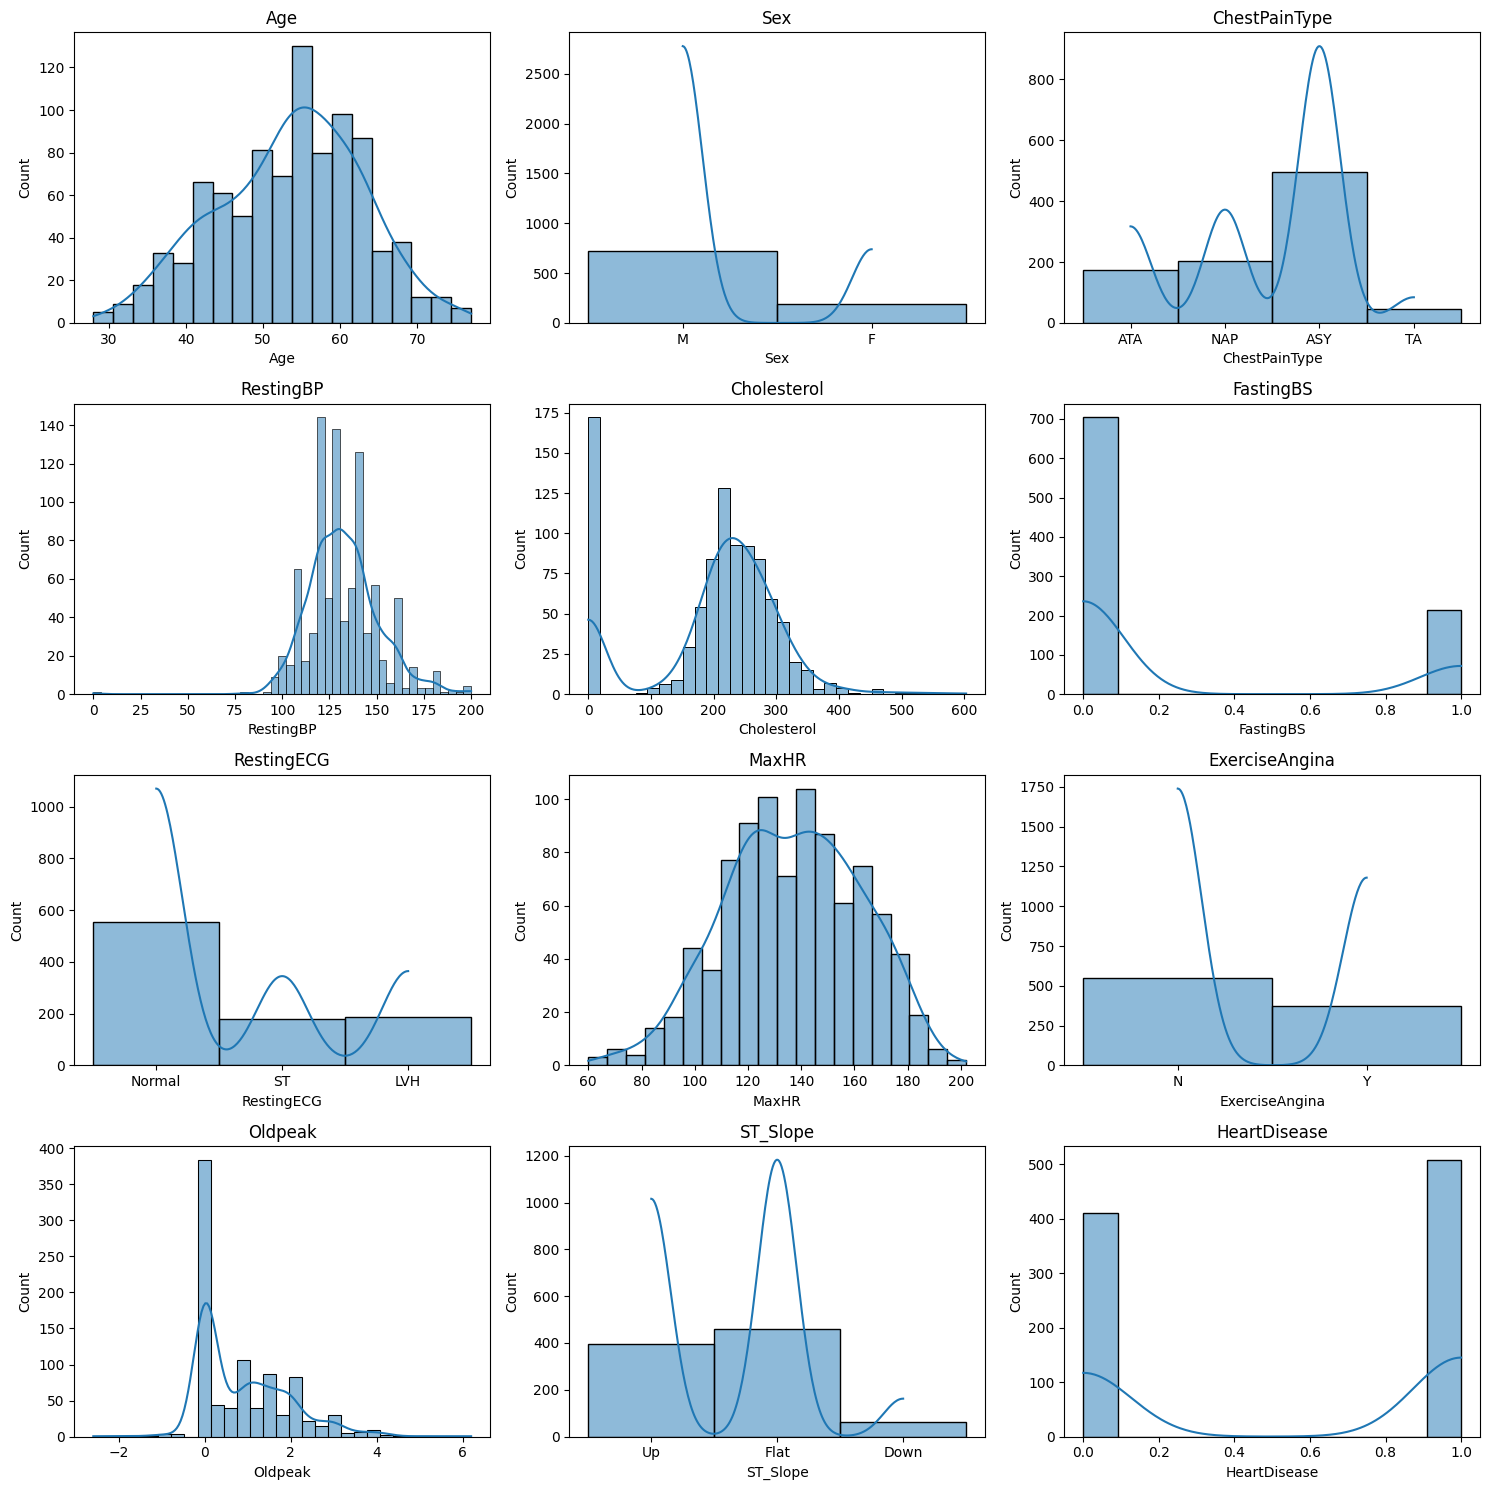

In [10]:
# Create a 4x3 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

# Loop through each column of the dataset
for i, column in enumerate(df.columns):
  # Calculate the row and column index for the subplot
  row = i // 3
  col = i % 3

  # Plot the distribution of the data for the current column
  sns.histplot(data=df, x=column, ax=axes[row, col], kde=True)
  axes[row, col].set_title(column)

# Adjust the layout of the subplots and display the plot
plt.tight_layout()
plt.show()



> Notice that there are many instances of Cholesterol being 0. This is not possible. Which makes up about 19% of samples. We figure out how to impute the data in feature engineering section



In [11]:
print('Total number of samples with cholesterol being 0: ', len(df[df["Cholesterol"]==0]))
print('Percentage of samples with cholesterol being 0: ', len(df[df["Cholesterol"]==0])/len(df)*100)

Total number of samples with cholesterol being 0:  172
Percentage of samples with cholesterol being 0:  18.736383442265794


In [12]:
px.imshow(df.corr(numeric_only=True),title="Correlation Plot of the Heat Failure Prediction")



> Heart disease has a negative correlation with MaxHR and Cholesterol. And a postitive correlation with Oldpeak, FastingBS, RestingBP


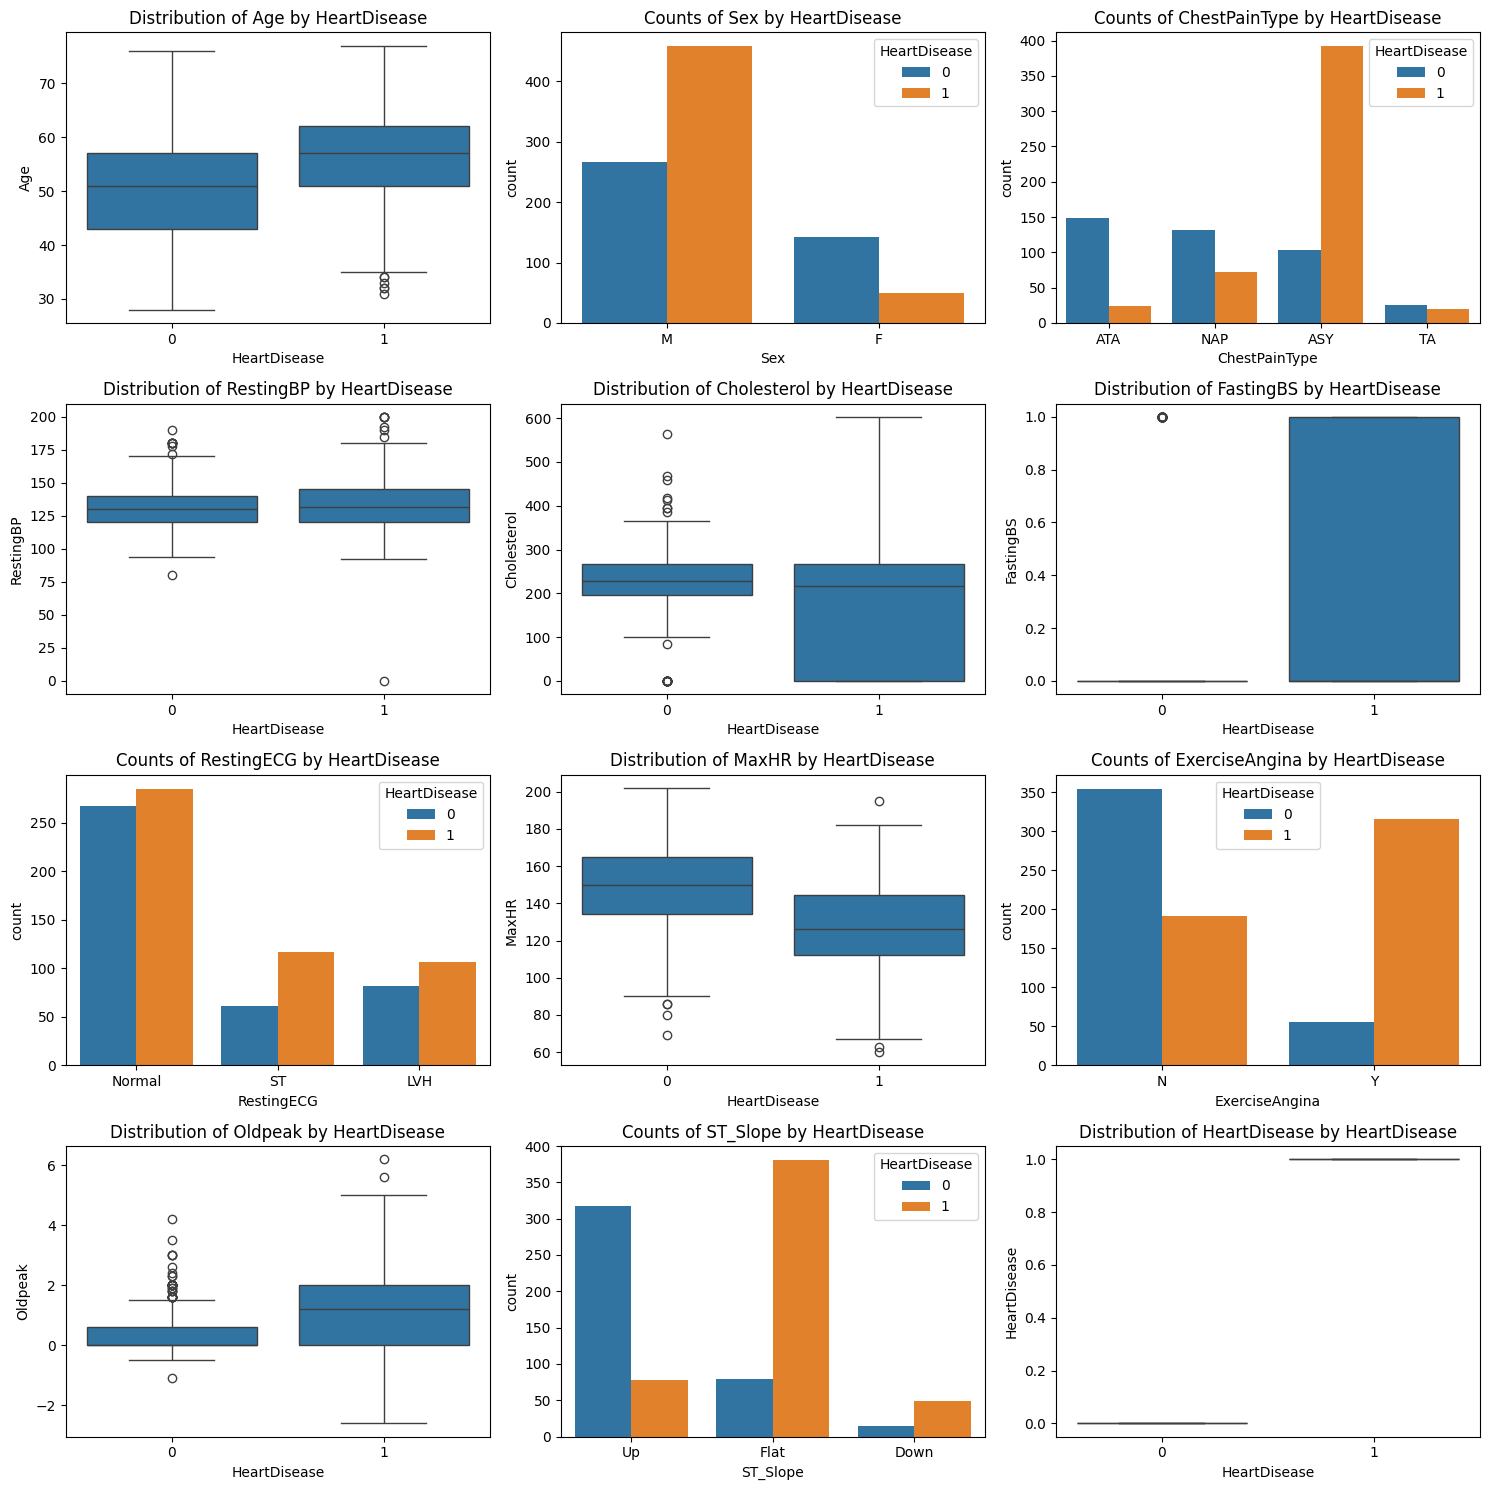

In [13]:
# Create a 4x3 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

# Loop through each column of the dataset
for i, column in enumerate(df.columns):
    # Calculate the row and column index for the subplot
    row = i // 3
    col = i % 3

    if pd.api.types.is_numeric_dtype(df[column]):
        # For numerical columns, plot the distribution of HeartDisease
        sns.boxplot(x="HeartDisease", y=column, data=df, ax=axes[row, col])
        axes[row, col].set_title(f"Distribution of {column} by HeartDisease")
    else:
        # For categorical columns, plot the counts of each category by HeartDisease
        sns.countplot(x=column, hue="HeartDisease", data=df, ax=axes[row, col])
        axes[row, col].set_title(f"Counts of {column} by HeartDisease")

# Adjust the layout of the subplots and display the plot
plt.tight_layout()
plt.show()

[]

<Figure size 1500x1000 with 0 Axes>

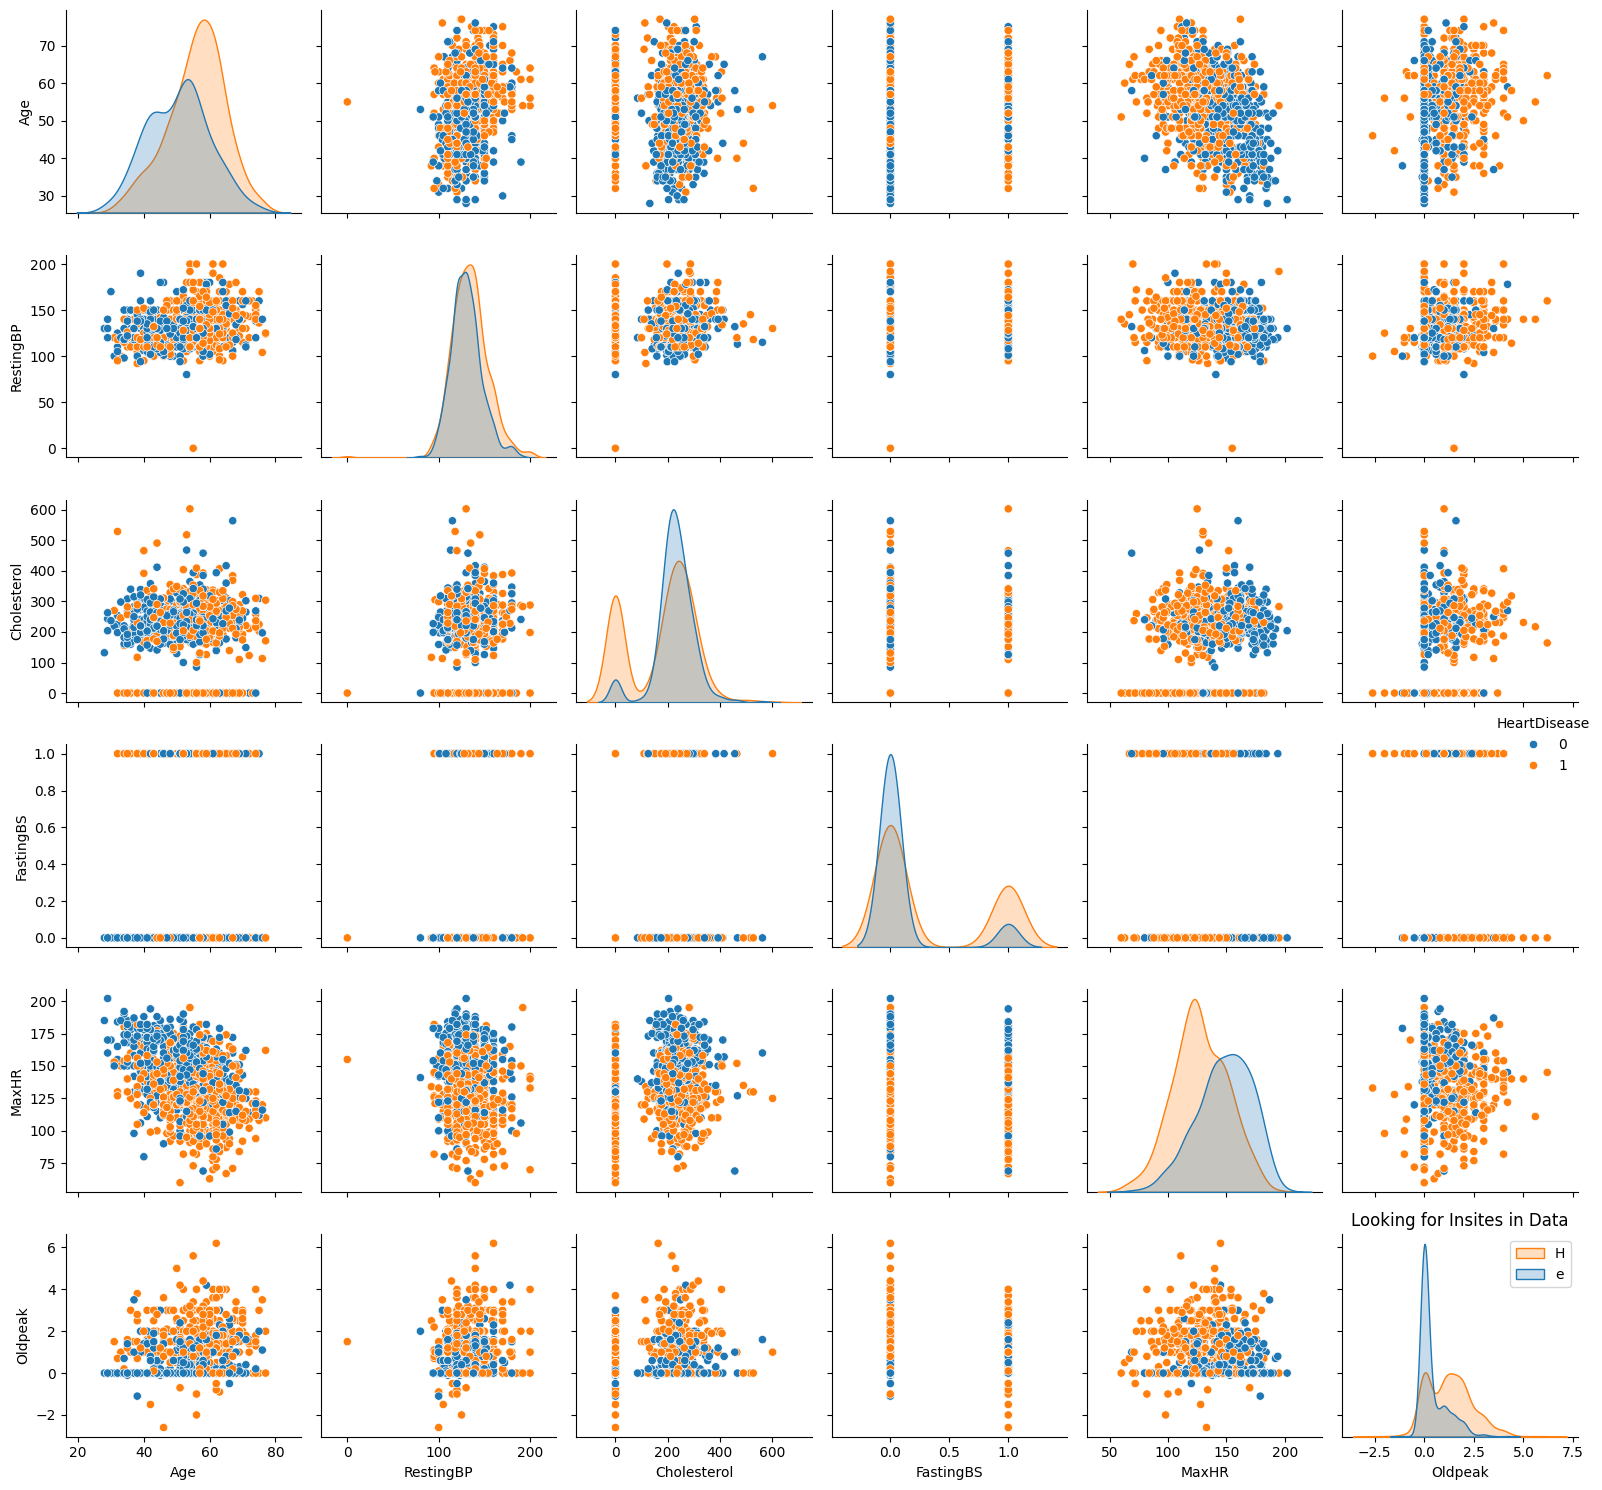

In [14]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

# Feature Engineering

## Cholesterol = 0

In [15]:
df_c = df.copy()

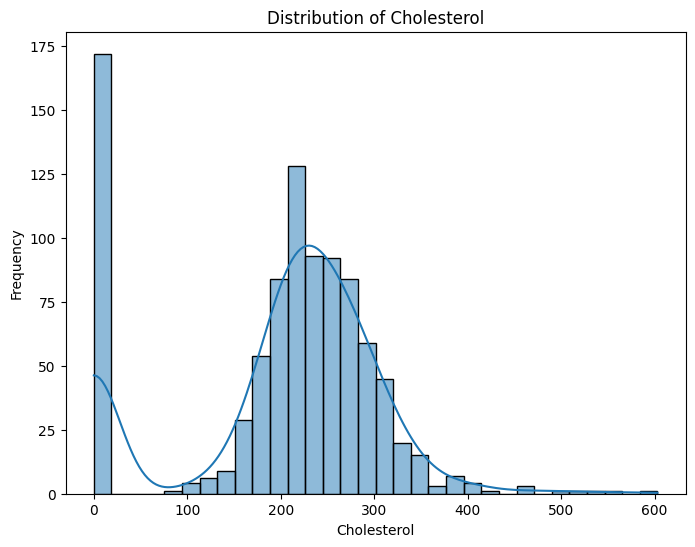

In [16]:
# Plot the distribution of cholesterol
plt.figure(figsize=(8, 6))
sns.histplot(df['Cholesterol'], kde=True)
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

In [17]:
print('Total number of samples with cholesterol being 0: ', len(df[df["Cholesterol"]==0]))
print('Percentage of samples with cholesterol being 0: ', len(df[df["Cholesterol"]==0])/len(df)*100)

Total number of samples with cholesterol being 0:  172
Percentage of samples with cholesterol being 0:  18.736383442265794


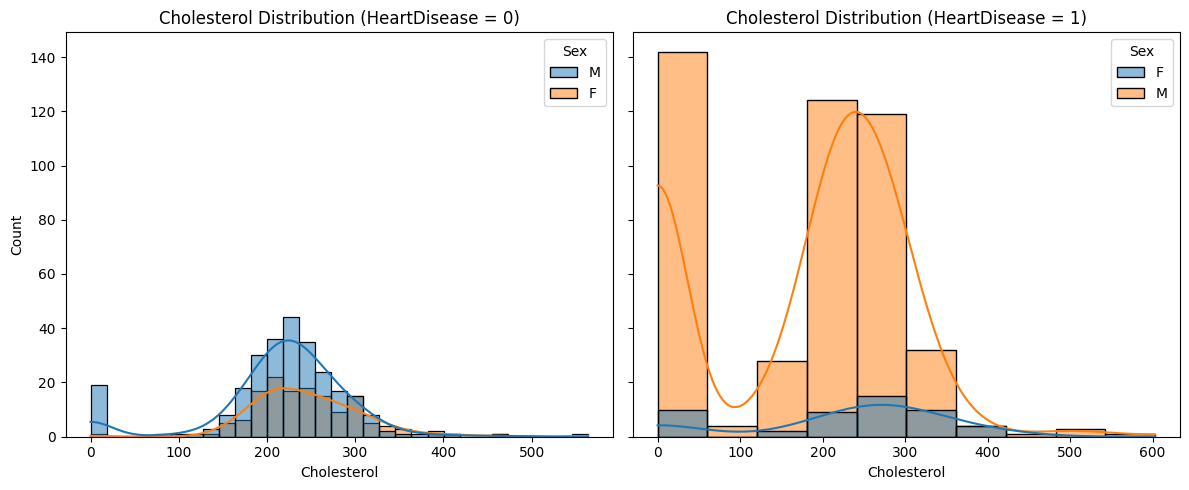

In [18]:
# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # sharey=True for the same y-axis scale

# Plot for HeartDisease = 0
sns.histplot(
    data=df_c[df_c['HeartDisease'] == 0],
    x='Cholesterol',
    hue='Sex',
    ax=axes[0],
    kde=True
)
axes[0].set_title('Cholesterol Distribution (HeartDisease = 0)')

# Plot for HeartDisease = 1
sns.histplot(
    data=df_c[df_c['HeartDisease'] == 1],
    x='Cholesterol',
    hue='Sex',
    ax=axes[1],
    kde=True
)
axes[1].set_title('Cholesterol Distribution (HeartDisease = 1)')

plt.tight_layout()
plt.show()



> Notice that the overwhelming that there is a large portion of people with heart disease that have a cholesterol of 0. We do not want to exclude them from the set. We will create 1 feature that says tested for cholesterol and another feature that imputes thes average cholestorel based on sex



In [19]:
# Create the "HasCholesterol" column based on the condition
df_c['HasCholesterol'] = (df_c['Cholesterol'] > 0).astype(int)

In [20]:
# Calculate the average cholesterol for each sex
average_cholesterol_by_sex = df_c.groupby('Sex')['Cholesterol'].mean()

# Create a function to impute the average cholesterol based on sex
def impute_cholesterol(row):
  if row['Cholesterol'] == 0:
    return average_cholesterol_by_sex[row['Sex']]
  else:
    return row['Cholesterol']

# Apply the function to create a new column 'ImputedCholesterol'
df_c['ImputedCholesterol'] = df_c.apply(impute_cholesterol, axis=1)

In [21]:
df_c.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'HasCholesterol', 'ImputedCholesterol'],
      dtype='object')

In [22]:
df_c.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HasCholesterol,ImputedCholesterol
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,289.0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,180.0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,283.0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,214.0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,195.0


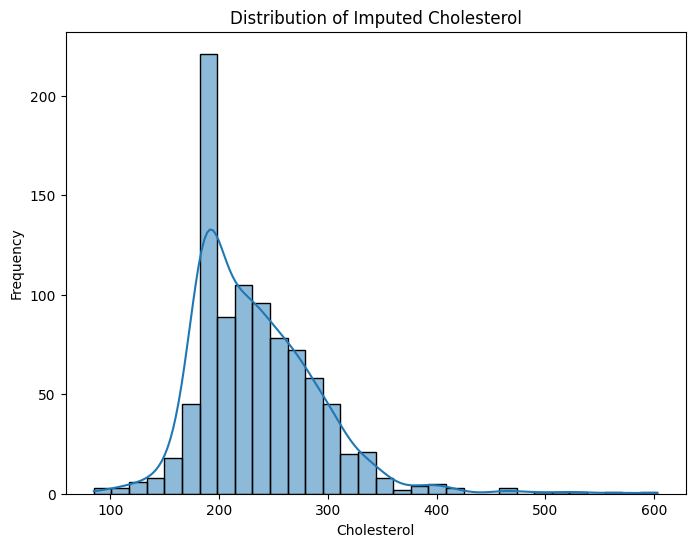

In [23]:
# Plot the distribution of cholesterol
plt.figure(figsize=(8, 6))
sns.histplot(df_c['ImputedCholesterol'], kde=True)
plt.title('Distribution of Imputed Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()



> We no longer have cholesterol levels of 0 but the distribution has changed. We will build models with the original cholesterol levels and without



## Categorical Features

Split features into categorical v numerical based on if they had 6 or more unique elements

In [24]:
def categorize_features(df):
    col = list(df.columns)
    categorical_features = []
    numerical_features = []
    for i in col:
        if len(df[i].unique()) > 6:
            numerical_features.append(i)
        else:
            categorical_features.append(i)
    print('Categorical Features :', categorical_features)
    print('Numerical Features :', numerical_features)
    return categorical_features, numerical_features

In [25]:
categorical_features, numerical_features = categorize_features(df)

Categorical Features : ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
Numerical Features : ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


In [26]:
def encode_categorical_features(df, categorical_features):
    le = LabelEncoder()
    for feature in categorical_features:
        df[feature] = le.fit_transform(df[feature])
    return df

## Scaling Features

In [27]:
def scale_features(df, numerical_features):
    mms = MinMaxScaler() # Normalization
    ss = StandardScaler() # Standardization

    # Apply MinMaxScaler to 'Oldpeak'
    if 'Oldpeak' in df.columns:
        df['Oldpeak'] = mms.fit_transform(df[['Oldpeak']])

    # Apply StandardScaler to numerical features except 'Oldpeak'
    for column in numerical_features:
        if column in df.columns and column != 'Oldpeak':
            df[column] = ss.fit_transform(df[[column]])

    return df

In [28]:
def process_dataframe(df):
    # Categorize features
    categorical_features, numerical_features = categorize_features(df)

    # Encode categorical features
    df = encode_categorical_features(df, categorical_features)

    # Scale numerical features
    df = scale_features(df, numerical_features)

    return df

In [29]:
df = process_dataframe(df)

Categorical Features : ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
Numerical Features : ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


# Modeling

In [30]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [31]:
df = df[original_col_list]

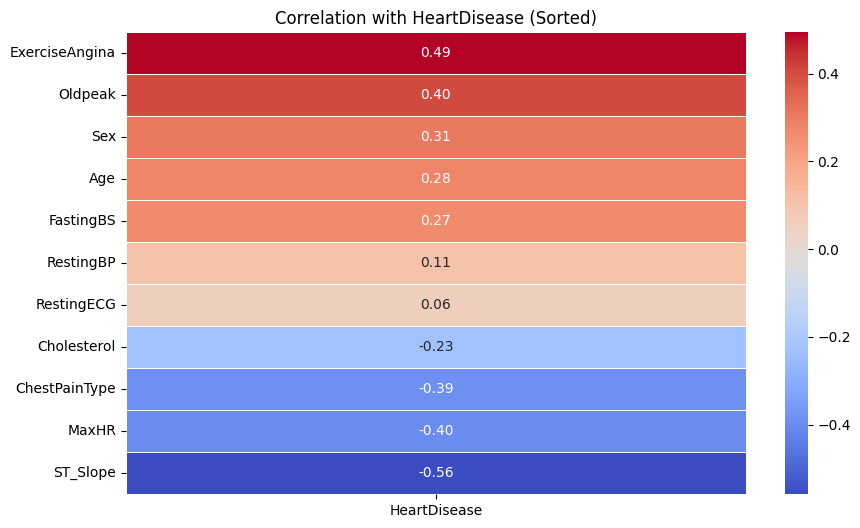

In [32]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Extract the correlation values with 'HeartDisease'
heartdisease_correlation = correlation_matrix['HeartDisease'].sort_values(ascending=False)

# Filter out the 'HeartDisease' correlation with itself
heartdisease_correlation = heartdisease_correlation[heartdisease_correlation.index != 'HeartDisease']

# Create a heatmap with correlation values sorted by their absolute value
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix[['HeartDisease']].loc[heartdisease_correlation.index],
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title('Correlation with HeartDisease (Sorted)')
plt.show()

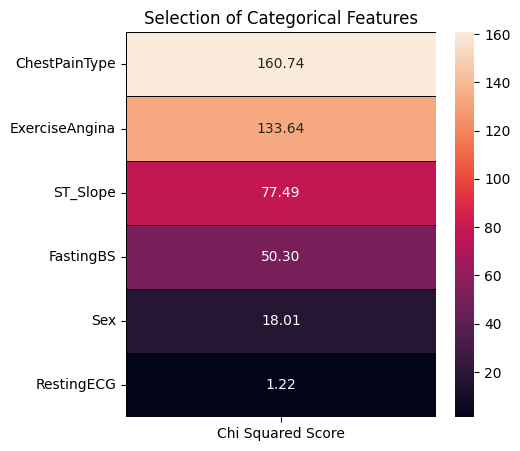

In [33]:
features = df.loc[:,categorical_features[:-1]]
target = df.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

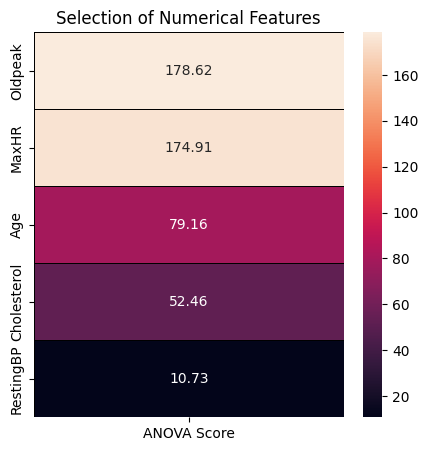

In [34]:
features = df.loc[:,numerical_features]
target = df.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [35]:
def prepare_data(df, omit_list=['HeartDisease', 'RestingBP', 'RestingECG']):
    features = df[df.columns.drop(omit_list)].values
    target = df['HeartDisease'].values
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=2)
    return x_train, x_test, y_train, y_test

In [36]:
def model(classifier, x_train, y_train, x_test, y_test):
    # Train the classifier
    classifier.fit(x_train, y_train)

    # Make predictions
    prediction = classifier.predict(x_test)

    # Print Accuracy and ROC AUC Score
    print("Accuracy: ", '{0:.2%}'.format(accuracy_score(y_test, prediction)))
    print("ROC_AUC Score: ", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))

    # Compute ROC curve
    y_proba = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba)))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def model_evaluation(classifier, x_test, y_test):
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, fmt='')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification Report
    print(classification_report(y_test, classifier.predict(x_test)))

In [37]:
df_processed = process_dataframe(df_c)

Categorical Features : ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease', 'HasCholesterol']
Numerical Features : ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'ImputedCholesterol']


In [38]:
x_train, x_test, y_train, y_test = prepare_data(df_processed) #omit_list=['Cholesterol'])

## Logistic Regression

Accuracy:  84.78%
ROC_AUC Score:  84.70%


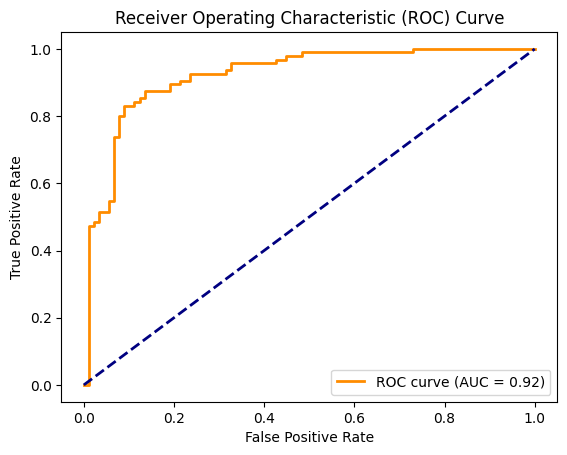

In [39]:
clf = LogisticRegression(random_state = 0,C=10,penalty= 'l2')
model(clf, x_train, y_train, x_test, y_test)

## Decision Tree

Accuracy:  84.78%
ROC_AUC Score:  84.62%


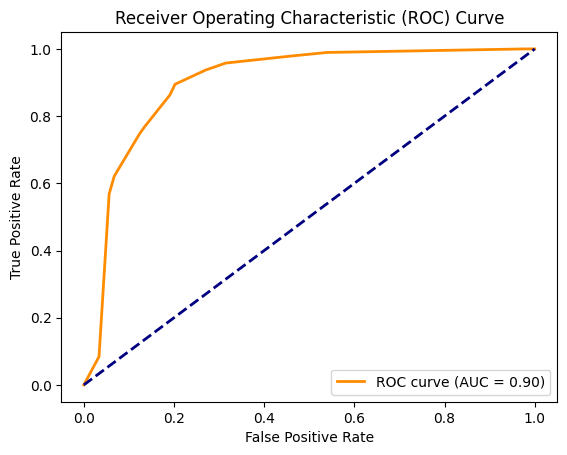

In [40]:
clf = DecisionTreeClassifier(random_state=1000, max_depth=4, min_samples_leaf=1)
model(clf, x_train, y_train, x_test, y_test)

## Random Forest Classifier

Accuracy:  84.24%
ROC_AUC Score:  84.06%


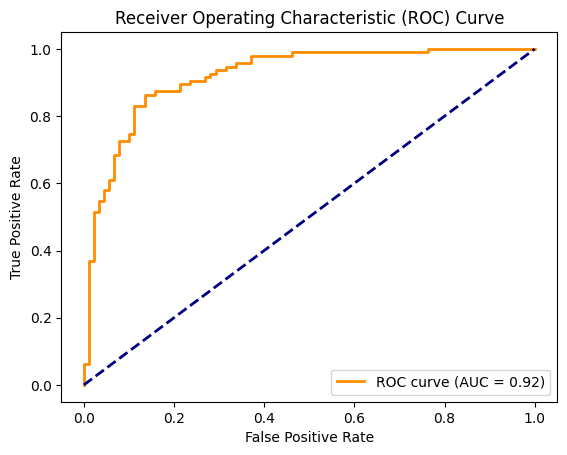

In [41]:
clf = RandomForestClassifier(max_depth=4,random_state=0)
model(clf, x_train, y_train, x_test, y_test)

# XGBoost Classifier

Accuracy:  84.78%
ROC_AUC Score:  84.66%


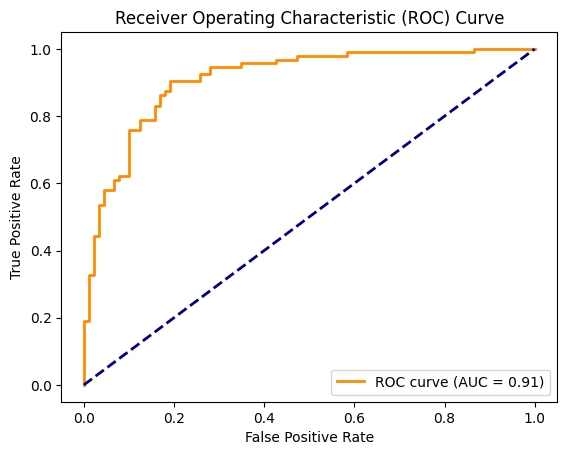

In [42]:
clf = XGBClassifier()
model(clf, x_train, y_train, x_test, y_test)

In [43]:
def perform_grid_search(x_train, y_train):
    param_grid = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    }

    xgb = XGBClassifier()
    grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)
    grid_search.fit(x_train, y_train)

    print("Best Parameters: ", grid_search.best_params_)
    print("Best ROC AUC Score: ", grid_search.best_score_)

    return grid_search.best_estimator_

# Hyperparameter Tuning

In [44]:
perform_grid_search(x_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best ROC AUC Score:  0.9300442952228322


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy:  85.33%
ROC_AUC Score:  85.22%


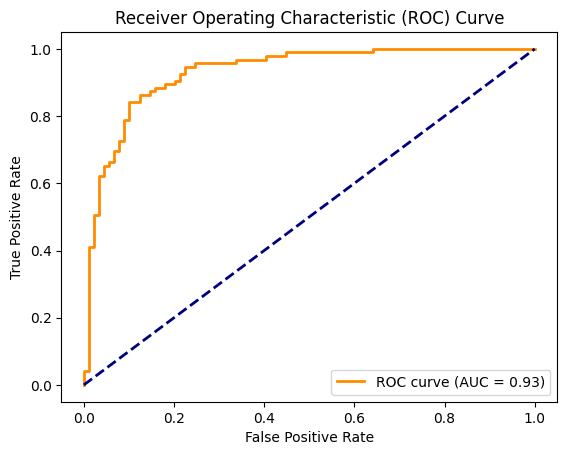

In [45]:
clf = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8)
model(clf, x_train, y_train, x_test, y_test)